In [3]:
#%matplotlib notebook
import h5py, pickle
import numpy as np
import numpy
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression as LRG
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from skimage.measure import block_reduce
import seaborn as sn
import lib.hos as hos

para = {'figure.figsize'  : (8, 6) }
plt.rcParams.update(para)

mod_list = ['OOK', '4ASK', '8ASK', 'BPSK', 'QPSK', '8PSK', '16PSK', '32PSK', '16APSK',\
         '32APSK', '64APSK', '128APSK', '16QAM', '32QAM', '64QAM', '128QAM', \
         '256QAM', 'GMSK', 'OQPSK']
mod = [i for i in range(0, 24) if i not in [17,18,19,20,21]]  # all digital mods.

hf = h5py.File('../../dataset/201801a_data_test.h5', 'r+')
x = hf['test']
p = int(len(x) / 24)
pp = int(p / 26)
pts = 300
tr = int(pts // 10) * 9
te = pts - tr

def create_label(cls, num):
    mods = range(cls)
    mo = []
    for m in mods:
        mo.append([m] * num)
    mo = np.hstack(mo)
    return mo

def lda(out_tr, yy_tr, out_te, yy_te):
    lda = LDA().fit(out_tr, yy_tr)
    cm = confusion_matrix(yy_te, lda.predict(out_te))
    return lda.score(out_te, yy_te), cm

def run(snr, trans):
    ccsd0 = []
    ccsd1 = []
    for i in mod:
        for j in snr:
            base = i*p + j*pp + 2
            s = x[base:(base + pts),:,0] + 1j*x[base:(base + pts),:,1]
            s = getattr(hos, trans)(s)

            ccsd0.append(s[:tr, :])
            ccsd1.append(s[tr::, :])

    ccsd0 = np.asarray(ccsd0)
    ccsd1 = np.asarray(ccsd1)
    l = ccsd0.shape[-1]
    if np.iscomplexobj(ccsd0):
        print ('complex trans')
        ccsd0, ccsd1 = np.abs(ccsd0), np.abs(ccsd1)
        
    ccsd0 = ccsd0.reshape((-1, l))
    ccsd1 = ccsd1.reshape((-1, l))
    print (ccsd0.shape, ccsd1.shape)
    return ccsd0, ccsd1


complex trans
(41040, 14) (4560, 14)
start test
acc: 0.5760964912280702


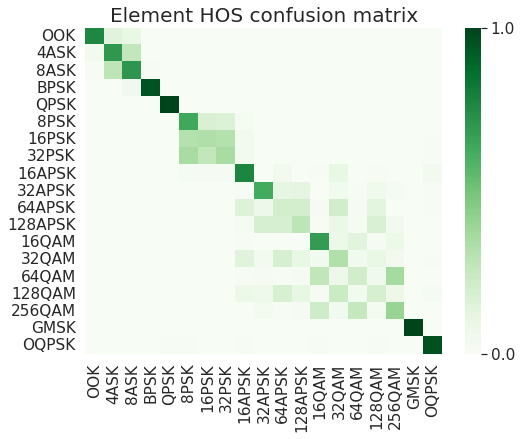

complex trans
(41040, 14) (4560, 14)
start test
acc: 0.2530701754385965


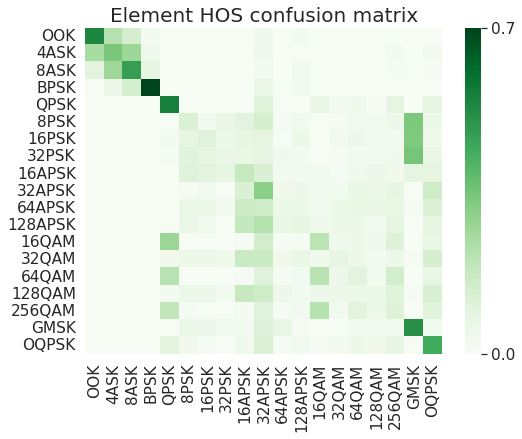

complex trans
(41040, 14) (4560, 14)
start test
acc: 0.06271929824561404


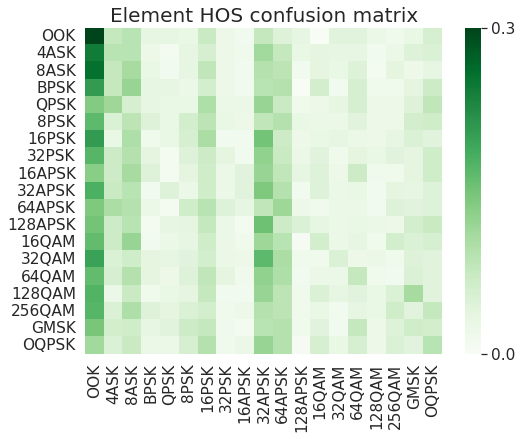

In [4]:
trans = 'HOC_element'

snr = range(18,26)
x_tr, x_te = run(snr, trans)
yy_tr = create_label(len(mod), tr * len(snr))
yy_te = create_label(len(mod), te * len(snr))

print ('start test')
sc, cm = lda(x_tr, yy_tr, x_te, yy_te)
print ('acc:', sc)
row, col = np.diag_indices_from(cm)
cm[row,col] += 4
fig = plt.figure()
plt.title("Element HOS confusion matrix", fontsize =20)
sn.set(font_scale=1.4) # for label size
ax = sn.heatmap(cm, xticklabels=mod_list, yticklabels=mod_list, cmap='Greens')
c_bar = ax.collections[0].colorbar
c_bar.set_ticks([np.min(cm), np.max(cm)])
c_bar.set_ticklabels(['%.1f'% (np.min(cm)/244), '%.1f'% (np.max(cm)/244)])
plt.show()
#######################  MID SNR.
snr = range(8,16)
x_tr, x_te = run(snr, trans)
yy_tr = create_label(len(mod), tr * len(snr))
yy_te = create_label(len(mod), te * len(snr))

print ('start test')
sc, cm = lda(x_tr, yy_tr, x_te, yy_te)
print ('acc:', sc)
row, col = np.diag_indices_from(cm)
cm[row,col] += 4
fig = plt.figure()
plt.title("Element HOS confusion matrix", fontsize =20)
sn.set(font_scale=1.4) # for label size
ax = sn.heatmap(cm, xticklabels=mod_list, yticklabels=mod_list, cmap='Greens')
c_bar = ax.collections[0].colorbar
c_bar.set_ticks([np.min(cm), np.max(cm)])
c_bar.set_ticklabels(['%.1f'% (np.min(cm)/244), '%.1f'% (np.max(cm)/244)])
plt.show()
#######################  LOW SNR.
snr = range(0,8)
x_tr, x_te = run(snr, trans)
yy_tr = create_label(len(mod), tr * len(snr))
yy_te = create_label(len(mod), te * len(snr))

print ('start test')
sc, cm = lda(x_tr, yy_tr, x_te, yy_te)
print ('acc:', sc)
row, col = np.diag_indices_from(cm)
cm[row,col] += 4
fig = plt.figure()
plt.title("Element HOS confusion matrix", fontsize =20)
sn.set(font_scale=1.4) # for label size
ax = sn.heatmap(cm, xticklabels=mod_list, yticklabels=mod_list, cmap='Greens')
c_bar = ax.collections[0].colorbar
c_bar.set_ticks([np.min(cm), np.max(cm)])
c_bar.set_ticklabels(['%.1f'% (np.min(cm)/244), '%.1f'% (np.max(cm)/244)])
plt.show()


In [ ]:
lda = LDA().fit(xx, yy)
lda.score(xx, yy)


In [ ]:
pca = PCA(n_components=7)
xx = pca.fit_transform(xx)
print (xx.shape)
lda = LDA().fit(xx, yy)
lda.score(xx, yy)


In [ ]:
lda = LDA(n_components=2)
lda = lda.fit(xx, yy)
X_lda = lda.transform(xx)


In [ ]:
colors = cm.rainbow(np.linspace(0, 1, len(mod)))
plt.figure(figsize = (7, 7))
plt.scatter(X_lda[:, 0], X_lda[:, 1], alpha=0.6, c=colors[yy])


### SNR -5 dB to +10 dB.

In [ ]:
snr = range(8,16)
xx = []
for i in mod:
    for j in snr:
        for k in range(1, pts + 1):
            base = i*p + j*pp + k
            s = hos.HOC_element(x[base,:,0] + 1j*x[base,:,1])
            xx.append(abs(s))
    print (mods_[i])
xx = np.asarray(xx)
print (xx.shape)

yy = []
for i in range(len(mod)):
    yy.append([i] * int(pts * len(snr)))
yy = np.hstack(yy)
print (yy.shape)


In [ ]:
lda = LDA().fit(xx, yy)
lda.score(xx, yy)


In [ ]:
lda = LDA(n_components=2)
lda = lda.fit(xx, yy)
X_lda = lda.transform(xx)


In [ ]:
colors = cm.rainbow(np.linspace(0, 1, len(mod)))
plt.figure(figsize = (7, 7))
plt.scatter(X_lda[:, 0], X_lda[:, 1], alpha=0.6, c=colors[yy])


### SNR larger than +10 dB.

In [ ]:
snr = range(16,26)
xx = []
for i in mod:
    for j in snr:
        for k in range(1, pts + 1):
            base = i*p + j*pp + k
            s = hos.HOC_element(x[base,:,0] + 1j*x[base,:,1])
            xx.append(abs(s))
    print (mods_[i])
xx = np.asarray(xx)
print (xx.shape)

yy = []
for i in range(len(mod)):
    yy.append([i] * int(pts * len(snr)))
yy = np.hstack(yy)
print (yy.shape)


In [ ]:
lda = LDA().fit(xx, yy)
lda.score(xx, yy)


In [ ]:
lda = LDA(n_components=2)
lda = lda.fit(xx, yy)
X_lda = lda.transform(xx)


In [ ]:
colors = cm.rainbow(np.linspace(0, 1, len(mod)))
plt.figure(figsize = (7, 7))
plt.scatter(X_lda[:, 0], X_lda[:, 1], alpha=0.6, c=colors[yy])


## Logistic Regression.

In [ ]:
lrg = LRG(max_iter=200, n_jobs=-1, penalty='l2',\
          random_state=0, solver='liblinear', multi_class='ovr').fit(xx, yy)


In [ ]:
lrg.score(xx, yy)
